<a href="https://colab.research.google.com/github/SefiyeArican/plant_seedlings_classification/blob/main/VeriMadencili%C4%9Fi%C3%96devi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pandas
!pip install numpy
!pip install plotly
!pip install keras
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

İLGİLİ KÜTÜPHANELERİN İMPORT EDİLMESİ

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

DRIVE ÜZERİNDEN VERİSETİNE ERİŞİM

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/plant-seedlings-classification.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

Pandas kütüphane ile veri setimizi açabiliyoruz ama görüntü işlemede veri setinin yapısını anlamak, görüntülerin boyutlarını, sınıf etiketlerini öğrenebilmek için "Os" modülünden yararlanıyoruz.

VERİ YÜKLEME VE İNCELEME

In [4]:
import os

# Veri setinin bulunduğu dizin
data_dir = '/content'

# Train sınıfı ve alt sınıflar için
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki alt dizinlerin listesi
        sub_classes = [sub_class for sub_class in os.listdir(class_dir) if os.path.isdir(os.path.join(class_dir, sub_class))]
        for sub_class_name in sub_classes:
            sub_class_dir = os.path.join(class_dir, sub_class_name)
            print(f"Alt Sınıf: {sub_class_name}")
            image_files = [file for file in os.listdir(sub_class_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
            if image_files:
                print(f"{len(image_files)} görüntü dosyası bulundu.")
            # else:
            #     print("Bu alt sınıfta görüntü dosyası bulunamadı.")
    # else:
    #     print(f"{class_name} bir sınıf dizini değil.")

print(" ")
# Test sınıfı için
test_dir = os.path.join(data_dir, 'test')
if os.path.isdir(test_dir):
    image_files = [file for file in os.listdir(test_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
    if image_files:
        print(f"Sınıf: test")
        print(f"{len(image_files)} görüntü dosyası bulundu.")
#     else:
#         print("Test sınıfında görüntü dosyası bulunamadı.")
# else:
#     print("Test sınıfı bulunamadı.")

Sınıf: .config
Alt Sınıf: configurations
Alt Sınıf: logs
Sınıf: drive
Alt Sınıf: .shortcut-targets-by-id
Alt Sınıf: MyDrive
Alt Sınıf: .file-revisions-by-id
Alt Sınıf: .Trash-0
Sınıf: train
Alt Sınıf: Charlock
390 görüntü dosyası bulundu.
Alt Sınıf: Shepherds Purse
231 görüntü dosyası bulundu.
Alt Sınıf: Loose Silky-bent
654 görüntü dosyası bulundu.
Alt Sınıf: Common wheat
221 görüntü dosyası bulundu.
Alt Sınıf: Scentless Mayweed
516 görüntü dosyası bulundu.
Alt Sınıf: Sugar beet
385 görüntü dosyası bulundu.
Alt Sınıf: Black-grass
263 görüntü dosyası bulundu.
Alt Sınıf: Fat Hen
475 görüntü dosyası bulundu.
Alt Sınıf: Maize
221 görüntü dosyası bulundu.
Alt Sınıf: Small-flowered Cranesbill
496 görüntü dosyası bulundu.
Alt Sınıf: Common Chickweed
611 görüntü dosyası bulundu.
Alt Sınıf: Cleavers
287 görüntü dosyası bulundu.
Sınıf: test
Sınıf: sample_data
 
Sınıf: test
794 görüntü dosyası bulundu.


Veri setinde 'test' ve 'train' adında iki sınıf bulunmaktadır. Train sınıfının toplam 12 alt sınıfı bulunmaktadır. Bunlar;
Black-grass,
Charlock,
Cleavers,
Common Chickweed,
Common wheat,
Fat Hen,
Loose Silky-bent,
Maize,
Scentless Mayweed,
Shepherds Purse,
Small-flowered Cranesbill,
Sugar beet.

SINIF DAĞILIMI GÖRSELLEŞTİRMESİ

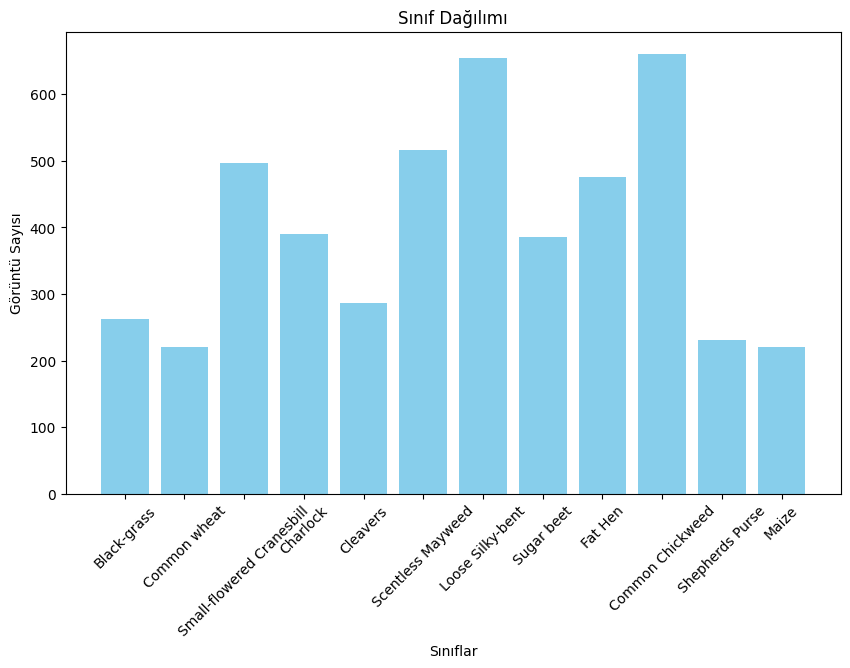

In [5]:
import matplotlib.pyplot as plt

# Sınıf adları ve sınıf içindeki görüntü sayıları
class_names = ['Black-grass','Common wheat', 'Small-flowered Cranesbill', 'Charlock', 'Cleavers', 'Scentless Mayweed',
              'Loose Silky-bent', 'Sugar beet', 'Fat Hen', 'Common Chickweed', 'Shepherds Purse', 'Maize']
class_counts = [263, 221, 496, 390, 287, 516, 654, 385, 475, 661, 231, 221]

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()


Burada bar grafiği ile sınıflardaki veri dağılımını görselleştirdik. Hangi sınıfta ne kadar görsel olduğunu yorumlayabiliyoruz.

ÖRNEK GÖRÜNTÜLERİN GÖRSELLEŞTİRİLMESİ

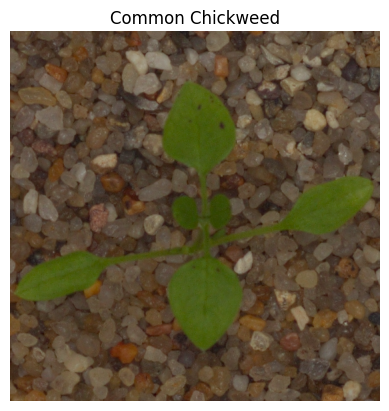

In [6]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content'

# train sınıfının 12 alt sınıfı olduğu için train ve test ana sınıflarını ayrı ayrı çekmemiz gerekiyor.
# train sınıfı verileri
class_train =  os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

# test sınıfı verileri
class_test = os.path.join(data_dir, 'test')

# Rastgele olarak 'train' alt sınıflarından veya 'test' sınıfından bir veri seçme işlemi
all_classes = ['test'] + train_sub_classes
selected_class = random.choice(all_classes)

# seçilecek ana sınıfa göre dosya yolu oluşturuyoruz.
if selected_class == 'test':
    selected_class_path = class_test
else:
    selected_class_path = os.path.join(class_train, selected_class)

sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(selected_class)
plt.show()


Her çalıştırıldığında rastgele bir sınıftan rastgele bir görüntü seçerek veri setinizdeki görüntüleri ve sınıfları daha iyi anlamanıza yardımcı olacak örnek görsel getirir.

GÖRÜNTÜ BOYUTLARINI ÖĞRENME

In [9]:
import os
import cv2

data_dir = '/content/train'

def get_image_sizes(directory):
    sizes = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is not None:
                    sizes.append(image.shape)
                else:
                    print(f"okunamayan görüntünün yolu: {image_path}")
    return sizes

# Tüm görüntülerin boyutlarını alma
image_sizes = get_image_sizes(data_dir)

# Boyut bilgilerini yazdırma işlemi
for size in image_sizes:
    print(f"Width: {size[1]}, Height: {size[0]}, Channels: {size[2]}")

# Benzersiz boyutları yazdırma
unique_sizes = set(image_sizes)
print("\nUnique image sizes in the dataset:")
for size in unique_sizes:
    print(f"Width: {size[1]}, Height: {size[0]}, Channels: {size[2]}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Width: 707, Height: 707, Channels: 3
Width: 132, Height: 132, Channels: 3
Width: 507, Height: 507, Channels: 3
Width: 368, Height: 368, Channels: 3
Width: 1048, Height: 1048, Channels: 3
Width: 383, Height: 383, Channels: 3
Width: 273, Height: 273, Channels: 3
Width: 107, Height: 107, Channels: 3
Width: 164, Height: 164, Channels: 3
Width: 228, Height: 228, Channels: 3
Width: 111, Height: 111, Channels: 3
Width: 85, Height: 85, Channels: 3
Width: 1943, Height: 1942, Channels: 3
Width: 1382, Height: 1382, Channels: 3
Width: 125, Height: 125, Channels: 3
Width: 131, Height: 131, Channels: 3
Width: 1352, Height: 1352, Channels: 3
Width: 168, Height: 168, Channels: 3
Width: 135, Height: 135, Channels: 3
Width: 163, Height: 163, Channels: 3
Width: 176, Height: 176, Channels: 3
Width: 99, Height: 99, Channels: 3
Width: 130, Height: 130, Channels: 3
Width: 115, Height: 115, Channels: 3
Width: 181, Height: 181, Channels: 3
Width: 1034, Height: 103

Burada train setindeki her bir görüntünün yükseklik ve genişlik değerlerini öğrendik. Buradaki Channels: 3 ifadesi, veri setinizdeki görüntülerin 3 kanallı olduğunu (RGB) gösterir.

Veri setindeki görüntülerin birbirinden farklı boyutlarda olduğunu öğrendik. Eğitimlerimi görüntü boyutlarını değiştirmeden yapmaya çalışacağım. Görüntüleri bir boyuta yeniden boyutlandırmak, bazı bilgilerin kaybolmasına neden olabilir. Özellikle, küçük boyutlara yeniden boyutlandırılan büyük görüntülerde detay kaybı yaşanabilir. O yüzden görüntülerin orijinal boyutlarını değiştirmeyeceğim.

GÖRÜNTÜDEKİ YEŞİL KANALINA ODAKLANARAK VERİ HAZIRLIĞI İŞLEMİ

In [11]:
import cv2
import os

# Veri setinin bulunduğu dizin
data_dir = '/content/train'

# Yeşil kanalı ayırmak için bir fonksiyon
def extract_green_channel(image_path):
    # Görüntüyü yükleme
    image = cv2.imread(image_path)
    # Yeşil kanalı alma
    green_channel = image[:, :, 1]  # Yeşil kanal, RGB'de 1. indekstir
    return green_channel

# Veri setindeki tüm görüntüler için yeşil kanalı ayırma işlmei
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki tüm görüntüler için yeşil kanalı ayır
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            green_channel = extract_green_channel(image_path)
            # Örneğin: cv2.imwrite('path/to/save/green_channel.jpg', green_channel) # Yeşil kanal görüntüsünü kaydetme işlemi
            print(f"Yeşil Kanal Görüntü Boyutu: {green_channel.shape}")
    else:
        print(f"{class_name} bir sınıf dizini değil.")


Sınıf: Charlock
Yeşil Kanal Görüntü Boyutu: (232, 232)
Yeşil Kanal Görüntü Boyutu: (134, 134)
Yeşil Kanal Görüntü Boyutu: (183, 183)
Yeşil Kanal Görüntü Boyutu: (210, 210)
Yeşil Kanal Görüntü Boyutu: (135, 135)
Yeşil Kanal Görüntü Boyutu: (422, 422)
Yeşil Kanal Görüntü Boyutu: (373, 373)
Yeşil Kanal Görüntü Boyutu: (354, 354)
Yeşil Kanal Görüntü Boyutu: (528, 528)
Yeşil Kanal Görüntü Boyutu: (184, 184)
Yeşil Kanal Görüntü Boyutu: (174, 174)
Yeşil Kanal Görüntü Boyutu: (396, 396)
Yeşil Kanal Görüntü Boyutu: (129, 129)
Yeşil Kanal Görüntü Boyutu: (351, 351)
Yeşil Kanal Görüntü Boyutu: (174, 174)
Yeşil Kanal Görüntü Boyutu: (910, 910)
Yeşil Kanal Görüntü Boyutu: (955, 955)
Yeşil Kanal Görüntü Boyutu: (341, 341)
Yeşil Kanal Görüntü Boyutu: (371, 371)
Yeşil Kanal Görüntü Boyutu: (386, 386)
Yeşil Kanal Görüntü Boyutu: (409, 409)
Yeşil Kanal Görüntü Boyutu: (626, 626)
Yeşil Kanal Görüntü Boyutu: (471, 471)
Yeşil Kanal Görüntü Boyutu: (179, 179)
Yeşil Kanal Görüntü Boyutu: (779, 779)
Yeşil Kan

GÖRÜNTÜ ARALIĞI ÖLÇEKLENDİRME

Ölçeklendirme, görüntü piksellerinin değerlerini belirli bir aralığa (genellikle 0,1 veya -1,1) dönüştürmek anlamına gelir. Ölçeklendirme işlemi, veri setinin piksel değerlerini birbirine benzer bir ölçekte tutarak, modelin daha iyi öğrenmesini ve daha hızlı eğitimini sağlar. Ayrıca ölçeklendirme, aşırı öğrenmeyi önlemeye yardımcı olabilir. Piksel değerlerinin belirli bir aralığa ölçeklenmesi, modelin daha genelleştirilmiş bir şekilde öğrenmesini teşvik edebilir.

In [12]:
import cv2
import os

# Veri setinin bulunduğu dizin
data_dir = '/content/train'

# Ölçeklendirme aralığı için minimum ve maksimum değerler
min_value = 0
max_value = 1

# Her sınıf için işlem yapma
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Sınıf dizinindeki görüntüler için işlem yapma
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Görüntüyü yükleyin ve ölçeklendirin
            image = cv2.imread(image_path)
            scaled_image = cv2.normalize(image, None, min_value, max_value, cv2.NORM_MINMAX)
            # Ölçeklendirilmiş görüntüyü kaydetme
            cv2.imwrite(image_path, scaled_image)


VERİYİ YENİDEN BOYUTLANDIRMA?????????????????

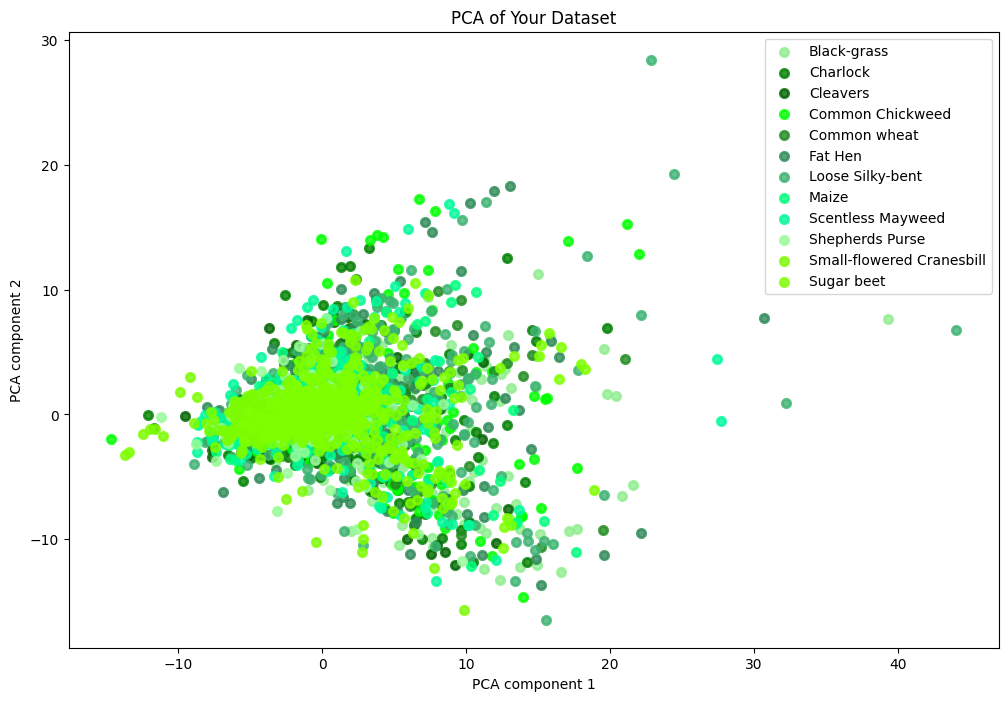

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import cv2
import numpy as np

data_dir = '/content/train'
classes = os.listdir(data_dir)

# Tüm verileri ve etiketleri depolamak için listeler
data = []
labels = []

# Veri setini yükleme işlemi
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resimleri yeniden boyutlandırma işlemi
            data.append(img)
            labels.append(class_name)

data = np.array(data)
labels = np.array(labels)

# Verileri şekillendirme ve normalleştirme
data = data.reshape((data.shape[0], -1)) / 255.0

# PCA ile boyut azaltma (2 bileşen)
pca = PCA(n_components=2)
X_r = pca.fit_transform(data)

# Görselleştirme için 12 farklı renk
colors = [
    'lightgreen', 'green', 'darkgreen', 'lime', 'forestgreen',
    'seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen',
    'palegreen', 'lawngreen', 'chartreuse'
]

# Sınıf isimlerini ve renkleri eşleştirme
unique_classes = np.unique(labels)
color_map = {class_name: colors[i % len(colors)] for i, class_name in enumerate(unique_classes)}

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))
for class_name in unique_classes:
    plt.scatter(X_r[labels == class_name, 0], X_r[labels == class_name, 1],
                color=color_map[class_name], alpha=.8, lw=2, label=class_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Your Dataset')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()


VERİ ÖN İŞLEME

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

# Resim boyutu ve batch size tanımlama
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Eğitim verisi için ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Eğitim verilerini yükleme
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test verisi için ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# Test verilerini yükleme
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)


Found 4750 images belonging to 12 classes.
Found 0 images belonging to 0 classes.


MODEL OLUŞTURMA

In [ ]:
# Önceden eğitilmiş ResNet50 modelini yükleme
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modelin üzerine ek katmanlar ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Modeli oluşturma
model = Model(inputs=base_model.input, outputs=predictions)

# İlk katmanlar dondurularak sadece üst katmanlar eğitilecek
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


MODELİN EĞİTİLMESİ

In [ ]:
# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
149/149 [==============================] - 1233s 8s/step - loss: 2.5250 - accuracy: 0.1232
Epoch 2/10
149/149 [==============================] - 1142s 8s/step - loss: 2.4377 - accuracy: 0.1383
Epoch 3/10
149/149 [==============================] - 1176s 8s/step - loss: 2.4038 - accuracy: 0.1423
Epoch 4/10
149/149 [==============================] - 1189s 8s/step - loss: 2.3986 - accuracy: 0.1373
Epoch 5/10
149/149 [==============================] - 1211s 8s/step - loss: 2.3819 - accuracy: 0.1491
Epoch 6/10
149/149 [==============================] - 1184s 8s/step - loss: 2.3716 - accuracy: 0.1533
Epoch 7/10
149/149 [==============================] - 1184s 8s/step - loss: 2.3705 - accuracy: 0.1520
Epoch 8/10
149/149 [==============================] - 1174s 8s/step - loss: 2.3710 - accuracy: 0.1488
Epoch 9/10
149/149 [==============================] - 1177s 8s/step - loss: 2.3658 - accuracy: 0.1568
Epoch 10/10
149/149 [==============================] - 1172s 8s/step - loss: 2.362

TAHMİN İŞLEMİ

In [ ]:
# Tahminleri alma
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Tahmin edilen sınıf indekslerini alma
predicted_class_indices = np.argmax(predictions, axis=1)

# Sınıf isimlerini alma
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Dosya isimlerini alma
filenames = test_generator.filenames

# Sonuçları bir DataFrame'e ekleme
results = pd.DataFrame({"file": filenames, "species": predictions})

# Tahminleri sample_submission.csv dosyasına yazma
results.to_csv('sample_submission.csv', index=False)


174/174 [==============================] - 272s 2s/step


EĞİTİMİN DOĞRULUĞU VE EĞİTİMDEKİ KAYIP

KeyError: 'val_accuracy'

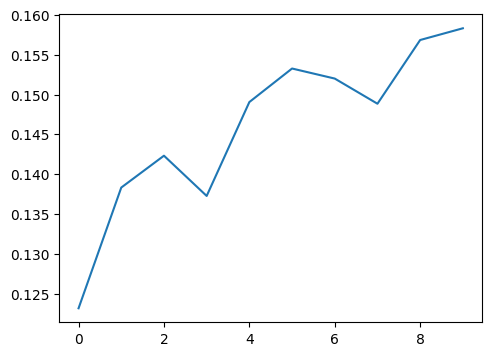

In [ ]:
# Eğitim ve doğrulama kayıplarını ve doğruluklarını çizme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Kayıp')
plt.show()
